In [ ]:
import pandas as pd
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib
import tkinter as tk
from tkinter import ttk, messagebox
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('dataset/thyroid_disorder.csv')
print(tabulate(df.head(5), headers='keys', tablefmt='rounded_outline'))
print(tabulate(df.tail(5), headers='keys', tablefmt='rounded_outline'))

╭────┬───────┬───────┬────────────────┬──────────────────────┬─────────────────────────────┬────────┬────────────┬───────────────────┬──────────────────┬─────────────────────┬──────────────────────┬───────────┬──────────┬─────────┬─────────────────┬─────────┬────────────────┬───────┬───────────────┬──────┬────────────────┬───────┬────────────────┬───────┬────────────────┬───────┬────────────────┬───────┬───────────────────┬───────────────╮
│    │   age │ sex   │ on thyroxine   │ query on thyroxine   │ on antithyroid medication   │ sick   │ pregnant   │ thyroid surgery   │ I131 treatment   │ query hypothyroid   │ query hyperthyroid   │ lithium   │ goitre   │ tumor   │ hypopituitary   │ psych   │ TSH measured   │   TSH │ T3 measured   │ T3   │ TT4 measured   │   TT4 │ T4U measured   │ T4U   │ FTI measured   │ FTI   │ TBG measured   │ TBG   │ referral source   │ binaryClass   │
├────┼───────┼───────┼────────────────┼──────────────────────┼─────────────────────────────┼────────┼───────────

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3711 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3711 non-null   object
 1   sex                        3711 non-null   object
 2   on thyroxine               3711 non-null   object
 3   query on thyroxine         3711 non-null   object
 4   on antithyroid medication  3711 non-null   object
 5   sick                       3711 non-null   object
 6   pregnant                   3711 non-null   object
 7   thyroid surgery            3711 non-null   object
 8   I131 treatment             3711 non-null   object
 9   query hypothyroid          3711 non-null   object
 10  query hyperthyroid         3711 non-null   object
 11  lithium                    3711 non-null   object
 12  goitre                     3711 non-null   object
 13  tumor                      3711 non-null   object
 14  hypopituitary

In [6]:
kolonat_per_heqje = [
    'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick',
    'thyroid surgery', 'I131 treatment', 'TBG measured', 'TBG', 'referral source',
    'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'T3 measured',
    'TT4 measured', 'T4U measured', 'FTI measured', 'TSH measured'
]

df_pk = df.drop(columns=kolonat_per_heqje, errors='ignore')


In [7]:
#Dataseti pas heqjes se kolonave:
print(tabulate(df_pk.head(200), headers='keys', tablefmt='rounded_outline'))

╭─────┬───────┬───────┬────────────┬─────────────────────┬──────────────────────┬───────┬──────┬───────┬───────┬───────┬───────────────╮
│     │   age │ sex   │ pregnant   │ query hypothyroid   │ query hyperthyroid   │ TSH   │ T3   │ TT4   │ T4U   │ FTI   │ binaryClass   │
├─────┼───────┼───────┼────────────┼─────────────────────┼──────────────────────┼───────┼──────┼───────┼───────┼───────┼───────────────┤
│   0 │    41 │ F     │ f          │ f                   │ f                    │ 1.3   │ 2.5  │ 125   │ 1.14  │ 109   │ P             │
│   1 │    23 │ F     │ f          │ f                   │ f                    │ 4.1   │ 2    │ 102   │ ?     │ ?     │ P             │
│   2 │    46 │ M     │ f          │ f                   │ f                    │ 0.98  │ ?    │ 109   │ 0.91  │ 120   │ P             │
│   3 │    70 │ F     │ f          │ f                   │ f                    │ 0.16  │ 1.9  │ 175   │ ?     │ ?     │ P             │
│   4 │    70 │ F     │ f          │ f   

In [8]:
df_pk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3711 entries, 0 to 3771
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 3711 non-null   object
 1   sex                 3711 non-null   object
 2   pregnant            3711 non-null   object
 3   query hypothyroid   3711 non-null   object
 4   query hyperthyroid  3711 non-null   object
 5   TSH                 3711 non-null   object
 6   T3                  3711 non-null   object
 7   TT4                 3711 non-null   object
 8   T4U                 3711 non-null   object
 9   FTI                 3711 non-null   object
 10  binaryClass         3711 non-null   object
dtypes: object(11)
memory usage: 347.9+ KB


In [9]:
kolonat = ['age', 'sex', 'pregnant', 'query hypothyroid', 'query hyperthyroid',
           'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'binaryClass']

In [10]:
kolona_numerike = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
kolona_kategorike = ['sex', 'pregnant', 'query hypothyroid', 'query hyperthyroid', 'binaryClass']

In [11]:
for kolona in kolona_numerike:
    df_pk[kolona] = pd.to_numeric(df_pk[kolona], errors='coerce')
    vlera_mesatare = df_pk[kolona].mean()
    df_pk[kolona] = df_pk[kolona].fillna(vlera_mesatare)

In [12]:
for kolona in kolona_kategorike:
    vlera_shpeshte = df_pk[kolona].mode()[0] 
    df_pk[kolona] = df_pk[kolona].fillna(vlera_shpeshte)

In [13]:
# Encode categorical columns cc
le = LabelEncoder()
for col in ['sex', 'pregnant', 'query hypothyroid', 'query hyperthyroid', 'binaryClass']:
    df_pk[col] = le.fit_transform(df_pk[col].astype(str))


In [14]:
#Numri i vlerave null pas pastrimit
print(df_pk[kolonat].isnull().sum())

age                   0
sex                   0
pregnant              0
query hypothyroid     0
query hyperthyroid    0
TSH                   0
T3                    0
TT4                   0
T4U                   0
FTI                   0
binaryClass           0
dtype: int64


In [15]:
#Te dhenat e pastruara
print(tabulate(df_pk[kolonat].head(100), headers='keys', tablefmt='rounded_outline'))

╭────┬───────┬───────┬────────────┬─────────────────────┬──────────────────────┬───────────┬────────┬─────────┬──────────┬─────────┬───────────────╮
│    │   age │   sex │   pregnant │   query hypothyroid │   query hyperthyroid │       TSH │     T3 │     TT4 │      T4U │     FTI │   binaryClass │
├────┼───────┼───────┼────────────┼─────────────────────┼──────────────────────┼───────────┼────────┼─────────┼──────────┼─────────┼───────────────┤
│  0 │    41 │     1 │          0 │                   0 │                    0 │   1.3     │ 2.5    │ 125     │ 1.14     │ 109     │             1 │
│  1 │    23 │     1 │          0 │                   0 │                    0 │   4.1     │ 2      │ 102     │ 0.994989 │ 110.481 │             1 │
│  2 │    46 │     2 │          0 │                   0 │                    0 │   0.98    │ 2.0135 │ 109     │ 0.91     │ 120     │             1 │
│  3 │    70 │     1 │          0 │                   0 │                    0 │   0.16    │ 1.9    │ 175 

In [16]:
for kolona in kolona_kategorike:
    if kolona in df_pk.columns:
        vlera_shpeshte = df_pk[kolona].mode()[0]
        df_pk[kolona] = df_pk[kolona].fillna(vlera_shpeshte)

In [17]:
enkodimi = LabelEncoder()
for kolona in kolona_kategorike:
    if kolona in df_pk.columns:
        df_pk[kolona] = enkodimi.fit_transform(df_pk[kolona])

In [39]:
print(tabulate(df_pk[kolonat].head(10), headers='keys', tablefmt='rounded_outline'))

╭────┬───────┬───────┬────────────┬─────────────────────┬──────────────────────┬─────────┬────────┬───────┬──────────┬─────────┬───────────────╮
│    │   age │   sex │   pregnant │   query hypothyroid │   query hyperthyroid │     TSH │     T3 │   TT4 │      T4U │     FTI │   binaryClass │
├────┼───────┼───────┼────────────┼─────────────────────┼──────────────────────┼─────────┼────────┼───────┼──────────┼─────────┼───────────────┤
│  0 │    41 │     1 │          0 │                   0 │                    0 │ 1.3     │ 2.5    │   125 │ 1.14     │ 109     │             1 │
│  1 │    23 │     1 │          0 │                   0 │                    0 │ 4.1     │ 2      │   102 │ 0.994989 │ 110.481 │             1 │
│  2 │    46 │     2 │          0 │                   0 │                    0 │ 0.98    │ 2.0135 │   109 │ 0.91     │ 120     │             1 │
│  3 │    70 │     1 │          0 │                   0 │                    0 │ 0.16    │ 1.9    │   175 │ 0.994989 │ 110.481 │  

In [19]:
df_pk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3711 entries, 0 to 3771
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 3711 non-null   float64
 1   sex                 3711 non-null   int64  
 2   pregnant            3711 non-null   int64  
 3   query hypothyroid   3711 non-null   int64  
 4   query hyperthyroid  3711 non-null   int64  
 5   TSH                 3711 non-null   float64
 6   T3                  3711 non-null   float64
 7   TT4                 3711 non-null   float64
 8   T4U                 3711 non-null   float64
 9   FTI                 3711 non-null   float64
 10  binaryClass         3711 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 347.9 KB


In [20]:
df_pk.to_csv("dataset/df_pastruarKolonat.csv", index=False)

In [21]:
df_pastruarKolonat = pd.read_csv('dataset/df_pastruarKolonat.csv')

In [22]:
def largo_outliers(df_pastruarKolonat, kolona):
    for kol in kolona:
        if kol in df_pastruarKolonat.columns:
            df_pastruarKolonat[kol] = pd.to_numeric(df_pastruarKolonat[kol], errors='coerce')
            
            Q1 =df_pastruarKolonat[kol].quantile(0.25)
            Q3 = df_pastruarKolonat[kol].quantile(0.75)
            IQR = Q3 - Q1

            kufiri_poshte = Q1 - 1.5 * IQR
            kufiri_larte = Q3 + 1.5 * IQR

            df_pastruarKolonat = df_pastruarKolonat[(df_pastruarKolonat[kol] >= kufiri_poshte) & (df_pastruarKolonat[kol] <= kufiri_larte)]

    return df_pastruarKolonat

In [40]:
print(tabulate(df_pastruarKolonat.head(10), headers='keys', tablefmt='rounded_outline'))

╭────┬───────┬───────┬────────────┬─────────────────────┬──────────────────────┬─────────┬────────┬───────┬──────────┬─────────┬───────────────╮
│    │   age │   sex │   pregnant │   query hypothyroid │   query hyperthyroid │     TSH │     T3 │   TT4 │      T4U │     FTI │   binaryClass │
├────┼───────┼───────┼────────────┼─────────────────────┼──────────────────────┼─────────┼────────┼───────┼──────────┼─────────┼───────────────┤
│  0 │    41 │     1 │          0 │                   0 │                    0 │ 1.3     │ 2.5    │   125 │ 1.14     │ 109     │             1 │
│  1 │    23 │     1 │          0 │                   0 │                    0 │ 4.1     │ 2      │   102 │ 0.994989 │ 110.481 │             1 │
│  2 │    46 │     2 │          0 │                   0 │                    0 │ 0.98    │ 2.0135 │   109 │ 0.91     │ 120     │             1 │
│  3 │    70 │     1 │          0 │                   0 │                    0 │ 0.16    │ 1.9    │   175 │ 0.994989 │ 110.481 │  

c:\Users\perve\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
c:\Users\perve\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
c:\Users\perve\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
c:\Users\perve\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
c:\Users\perve\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn

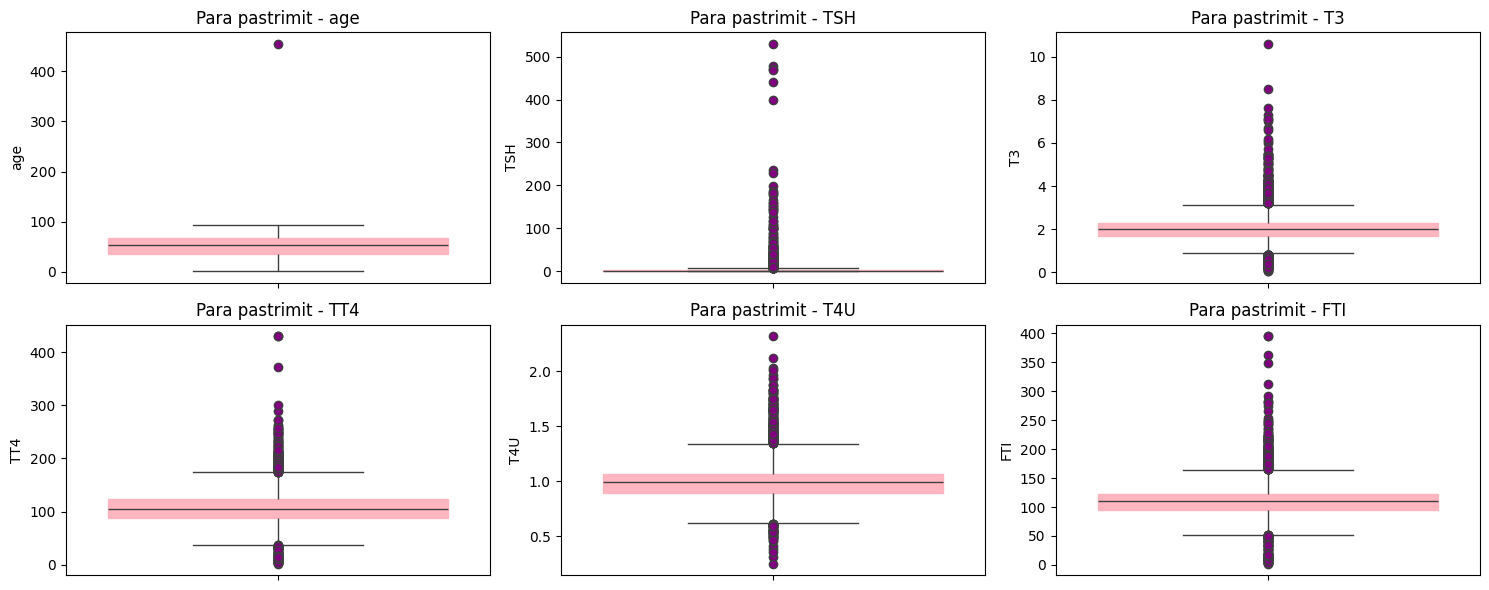

In [24]:
plt.figure(figsize=(15, 6))
for i, kol in enumerate(kolona_numerike):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df_pastruarKolonat, y=kol, boxprops=dict(color='lightpink'), flierprops=dict(markerfacecolor='purple'))
    plt.title(f'Para pastrimit - {kol}')
plt.tight_layout()
plt.show()


In [25]:
df_paster = largo_outliers(df_pastruarKolonat, kolona_numerike)

C:\Users\perve\AppData\Local\Temp\ipykernel_12080\585133268.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pastruarKolonat[kol] = pd.to_numeric(df_pastruarKolonat[kol], errors='coerce')


c:\Users\perve\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
c:\Users\perve\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
c:\Users\perve\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
c:\Users\perve\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
c:\Users\perve\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn

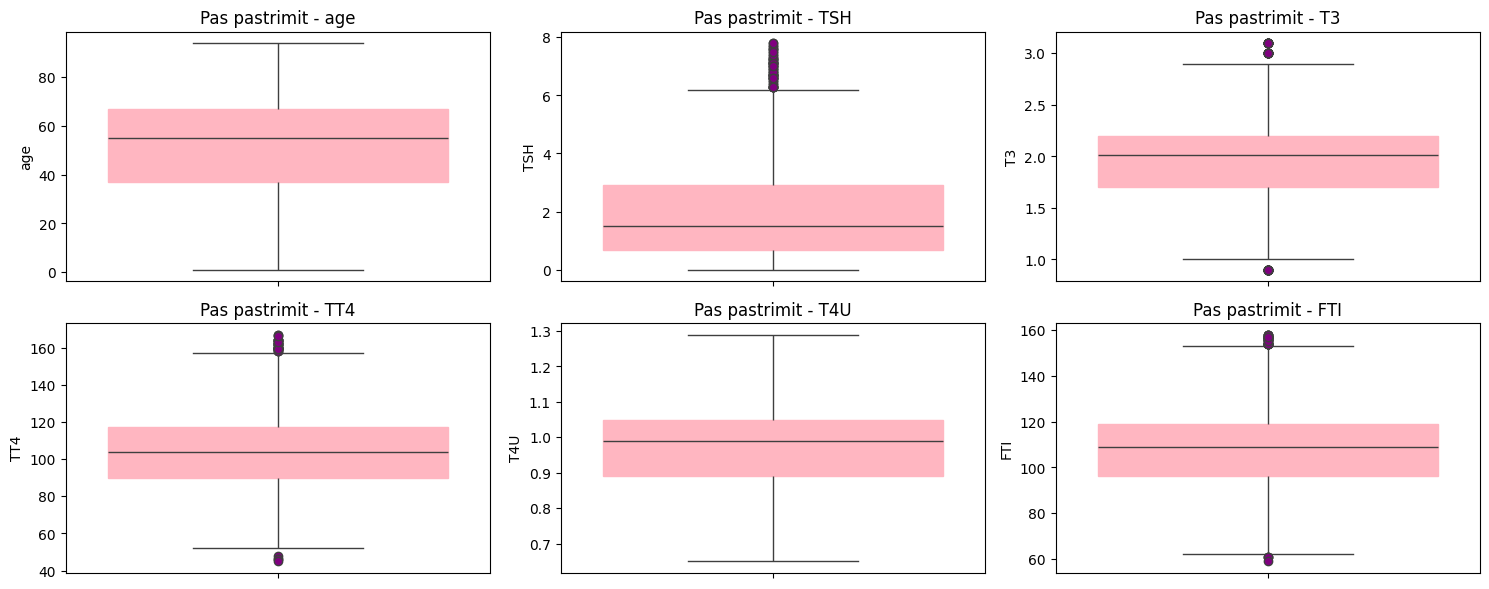

In [26]:
plt.figure(figsize=(15, 6))
for i, kol in enumerate(kolona_numerike):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df_paster, y=kol, boxprops=dict(color='lightpink'), flierprops=dict(markerfacecolor='purple'))
    plt.title(f'Pas pastrimit - {kol}')
plt.tight_layout()
plt.show()

In [27]:
df_pastruarKolonat.to_csv("dataset/df_po.csv", index=False)

In [28]:
df_pastruarOutliers= pd.read_csv('dataset/df_po.csv')

In [29]:
df_dc = df_pastruarOutliers.copy() #copied dataset of df_pastruarOutliers

numeric_cols = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']
for col in numeric_cols:
    df_dc[col] = pd.to_numeric(df_dc[col], errors='coerce')

def classify_patient(row):
    TSH, T3, TT4, T4U, FTI = row['TSH'], row['T3'], row['TT4'], row['T4U'], row['FTI']
    hypo = hyper = False

    if pd.notna(TSH):
        if TSH > 4.0:
            hypo = True
        elif TSH < 0.4:
            hyper = True

    if pd.notna(T3) and pd.notna(TT4):
        if T3 < 1.2 or TT4 < 70:
            hypo = True
        if T3 > 2.8 or TT4 > 140:
            hyper = True

    if pd.notna(FTI):
        if FTI < 80:
            hypo = True
        if FTI > 120:
            hyper = True

    if hypo and not hyper:
        return "hypothyroid"
    elif hyper and not hypo:
        return "hyperthyroid"
    elif hypo and hyper:
        return "inconclusive"
    else:
        return "euthyroid"

# kolona e re per klasifikimin e pacientit ne baze te vlerave te tyre

df_dc['diagnosis_class'] = df_dc.apply(classify_patient, axis=1)


df_dc.to_csv("dataset/dataset_me_diag.csv", index=False)


In [30]:
df_dc2 = pd.read_csv('dataset/dataset_me_diag.csv')

In [31]:
print(tabulate(df_dc2.head(10), headers='keys', tablefmt='rounded_outline'))

╭────┬───────┬───────┬────────────┬─────────────────────┬──────────────────────┬─────────┬────────┬───────┬──────────┬─────────┬───────────────┬───────────────────╮
│    │   age │   sex │   pregnant │   query hypothyroid │   query hyperthyroid │     TSH │     T3 │   TT4 │      T4U │     FTI │   binaryClass │ diagnosis_class   │
├────┼───────┼───────┼────────────┼─────────────────────┼──────────────────────┼─────────┼────────┼───────┼──────────┼─────────┼───────────────┼───────────────────┤
│  0 │    41 │     1 │          0 │                   0 │                    0 │ 1.3     │ 2.5    │   125 │ 1.14     │ 109     │             1 │ euthyroid         │
│  1 │    23 │     1 │          0 │                   0 │                    0 │ 4.1     │ 2      │   102 │ 0.994989 │ 110.481 │             1 │ hypothyroid       │
│  2 │    46 │     2 │          0 │                   0 │                    0 │ 0.98    │ 2.0135 │   109 │ 0.91     │ 120     │             1 │ euthyroid         │
│  3 │    

In [32]:
df_dc2[['diagnosis_class']].value_counts()


diagnosis_class
euthyroid          1256
hyperthyroid       1223
hypothyroid         958
inconclusive        274
Name: count, dtype: int64

In [33]:
#1 Random Forest 70/30 me SMOTE
X = df_dc2.drop(columns=['diagnosis_class', 'binaryClass'])
y = df_dc2['diagnosis_class']

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

rfc_7030 = RandomForestClassifier(random_state=42)
rfc_7030.fit(X_train, y_train)

y_pred = rfc_7030.predict(X_test)
print(classification_report(y_test, y_pred))

joblib.dump(rfc_7030, "models/random_forest_7030_model.pkl")

              precision    recall  f1-score   support

   euthyroid       0.98      0.99      0.99       377
hyperthyroid       0.99      0.99      0.99       377
 hypothyroid       0.98      0.99      0.99       377
inconclusive       0.99      0.96      0.97       377

    accuracy                           0.98      1508
   macro avg       0.98      0.98      0.98      1508
weighted avg       0.98      0.98      0.98      1508



['models/random_forest_7030_model.pkl']

In [36]:
#2 Random Forest 80/20 me SMOTE
X = df_dc2.drop(columns=['diagnosis_class', 'binaryClass'])
y = df_dc2['diagnosis_class']

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

rfc_8020 = RandomForestClassifier(random_state=42)
rfc_8020.fit(X_train, y_train)

y_pred = rfc_8020.predict(X_test)
print(classification_report(y_test, y_pred))


joblib.dump(rfc_8020, "models/random_forest_8020_model.pkl")


              precision    recall  f1-score   support

   euthyroid       0.99      0.99      0.99       251
hyperthyroid       0.99      0.99      0.99       251
 hypothyroid       0.98      1.00      0.99       252
inconclusive       1.00      0.97      0.98       251

    accuracy                           0.99      1005
   macro avg       0.99      0.99      0.99      1005
weighted avg       0.99      0.99      0.99      1005



['models/random_forest_8020_model.pkl']

In [35]:
#3 XGBoost 70/30 me SMOTE
X = df_dc2.drop(columns=['diagnosis_class', 'binaryClass'])
y = df_dc2['diagnosis_class']

X_resampled, y_resampled = sm.fit_resample(X, y)

label_encoder = LabelEncoder()
y_resampled_encoded = label_encoder.fit_transform(y_resampled)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_encoded, test_size=0.3, random_state=42, stratify=y_resampled_encoded)

xgb_7030_smote = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_7030_smote.fit(X_train, y_train)

y_pred = xgb_7030_smote.predict(X_test)
print( classification_report(label_encoder.inverse_transform(y_test), label_encoder.inverse_transform(y_pred)))

joblib.dump((xgb_7030_smote, label_encoder), "models/xgboost_7030_smote_model.pkl")


              precision    recall  f1-score   support

   euthyroid       0.98      1.00      0.99       377
hyperthyroid       1.00      0.99      0.99       377
 hypothyroid       0.98      0.99      0.98       377
inconclusive       0.98      0.97      0.97       377

    accuracy                           0.98      1508
   macro avg       0.98      0.98      0.98      1508
weighted avg       0.98      0.98      0.98      1508



c:\Users\perve\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:49:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


['models/xgboost_7030_smote_model.pkl']

In [37]:
#4 XGBoost 80/20 me SMOTE
X = df_dc2.drop(columns=['diagnosis_class', 'binaryClass'])
y = df_dc2['diagnosis_class']

X_resampled, y_resampled = sm.fit_resample(X, y)

label_encoder = LabelEncoder()
y_resampled_encoded = label_encoder.fit_transform(y_resampled)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled_encoded, test_size=0.2, random_state=42, stratify=y_resampled_encoded
)

xgb_8020_smote = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_8020_smote.fit(X_train, y_train)

y_pred = xgb_8020_smote.predict(X_test)
print( classification_report(label_encoder.inverse_transform(y_test), label_encoder.inverse_transform(y_pred)))

joblib.dump((xgb_8020_smote, label_encoder), "models/xgboost_8020_smote_model.pkl")


c:\Users\perve\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:51:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

   euthyroid       0.98      1.00      0.99       251
hyperthyroid       1.00      0.99      0.99       251
 hypothyroid       0.98      0.99      0.99       252
inconclusive       0.99      0.97      0.98       251

    accuracy                           0.99      1005
   macro avg       0.99      0.99      0.99      1005
weighted avg       0.99      0.99      0.99      1005



['models/xgboost_8020_smote_model.pkl']

In [38]:

model = joblib.load("models/random_forest_8020_model.pkl")
model_columns = model.feature_names_in_

def update_pregnancy_options(event=None):
    sex = sex_dropdown.get()
    if sex == "Mashkull":
        preg_dropdown.set("0")
        preg_dropdown.config(state="disabled")
    else:
        preg_dropdown.config(state="readonly")

def predict_diagnosis():
    try:
        age = age_entry.get()
        sex = sex_dropdown.get()
        TSH = tsh_entry.get()
        T3 = t3_entry.get()
        TT4 = tt4_entry.get()
        T4U = t4u_entry.get()
        FTI = fti_entry.get()
        pregnant = preg_dropdown.get()
        query_hypo = hypo_dropdown.get()
        query_hyper = hyper_dropdown.get()

        if not all([age, sex, TSH, T3, TT4, T4U, FTI]):
            messagebox.showerror("Gabim", "Ju lutem plotesoni te gjitha fushat!")
            return

        age = int(age)
        if not (0 <= age <= 100):
            raise ValueError("Mosha duhet te jete ndermjet 0 dhe 100")

        sex_val = 1 if sex == "Femer" else 2
        TSH = float(TSH)
        T3 = float(T3)
        TT4 = float(TT4)
        T4U = float(T4U)
        FTI = float(FTI)

        input_dict = {
            'age': age,
            'sex': sex_val,
            'TSH': TSH,
            'T3': T3,
            'TT4': TT4,
            'T4U': T4U,
            'FTI': FTI,
            'pregnant': int(pregnant),
            'query hypothyroid': int(query_hypo),
            'query hyperthyroid': int(query_hyper)
        }

        df_input = pd.DataFrame([input_dict])
        df_input = pd.get_dummies(df_input)
        df_input = df_input.reindex(columns=model_columns, fill_value=0)

        prediction = model.predict(df_input)[0]
        messagebox.showinfo("Rezultat", f"Parashikimi: {prediction}")

    except ValueError as e:
        messagebox.showerror("Gabim ne te dhena", str(e))
    except Exception as e:
        messagebox.showerror("Gabim", f"Ndodhi nje gabim: {e}")

root = tk.Tk()
root.title("Diagnoza per pacient te ri")

tk.Label(root, text="Mosha:").grid(row=0, column=0, sticky="e", padx=5, pady=5)
age_entry = tk.Entry(root, width=20)
age_entry.grid(row=0, column=1, padx=5, pady=5)

tk.Label(root, text="Gjinia:").grid(row=1, column=0, sticky="e", padx=5, pady=5)
sex_dropdown = ttk.Combobox(root, values=["Femer", "Mashkull"], state="readonly", width=18)
sex_dropdown.grid(row=1, column=1, padx=5, pady=5)
sex_dropdown.bind("<<ComboboxSelected>>", update_pregnancy_options)

tk.Label(root, text="Vlera e TSH:").grid(row=2, column=0, sticky="e", padx=5, pady=5)
tsh_entry = tk.Entry(root, width=20)
tsh_entry.grid(row=2, column=1, padx=5, pady=5)

tk.Label(root, text="Vlera e T3:").grid(row=3, column=0, sticky="e", padx=5, pady=5)
t3_entry = tk.Entry(root, width=20)
t3_entry.grid(row=3, column=1, padx=5, pady=5)

tk.Label(root, text="Vlera e TT4:").grid(row=4, column=0, sticky="e", padx=5, pady=5)
tt4_entry = tk.Entry(root, width=20)
tt4_entry.grid(row=4, column=1, padx=5, pady=5)

tk.Label(root, text="Vlera e T4U:").grid(row=5, column=0, sticky="e", padx=5, pady=5)
t4u_entry = tk.Entry(root, width=20)
t4u_entry.grid(row=5, column=1, padx=5, pady=5)

tk.Label(root, text="Vlera e FTI:").grid(row=6, column=0, sticky="e", padx=5, pady=5)
fti_entry = tk.Entry(root, width=20)
fti_entry.grid(row=6, column=1, padx=5, pady=5)

tk.Label(root, text="Vlera e Shtatzene:").grid(row=7, column=0, sticky="e", padx=5, pady=5)
preg_dropdown = ttk.Combobox(root, values=["0", "1"], state="readonly", width=18)
preg_dropdown.grid(row=7, column=1, padx=5, pady=5)

tk.Label(root, text="Histroik i Hiportiroidizmit:").grid(row=8, column=0, sticky="e", padx=5, pady=5)
hypo_dropdown = ttk.Combobox(root, values=["0", "1"], state="readonly", width=18)
hypo_dropdown.grid(row=8, column=1, padx=5, pady=5)

tk.Label(root, text="Historik i Hipertiroidizmit:").grid(row=9, column=0, sticky="e", padx=5, pady=5)
hyper_dropdown = ttk.Combobox(root, values=["0", "1"], state="readonly", width=18)
hyper_dropdown.grid(row=9, column=1, padx=5, pady=5)

tk.Button(root, text="Parashiko", command=predict_diagnosis).grid(row=10, column=0, columnspan=2, pady=10)
root.title("Diagnoza per pacient te ri")
root.configure(bg="#f9d6e5")

uniform_width = 20
for widget in root.winfo_children():
    if isinstance(widget, tk.Label):
        widget.config(width=uniform_width)
    elif isinstance(widget, (tk.Entry, ttk.Combobox)):
        widget.config(width=uniform_width)


for widget in root.winfo_children():
    if isinstance(widget, tk.Label):
        widget.configure(bg="#f9d6e5", fg="#000000", font=("Sans Serif", 12))
    elif isinstance(widget, (tk.Entry, ttk.Combobox)):
        widget.configure(font=("Sans Serif", 12))
    elif isinstance(widget, tk.Button):
        widget.configure(bg="#800080", fg="#ffffff", font=("Sans Serif", 12), relief="raised")
root.mainloop()